Discharge Q: -0.197 m³/day
Elevation Head Max:   1.0 mH2O
Total Head Max:       1.1 mH2O
Pressure Head Max:   0.15 mH2O
Pressure Head Min:  -0.20 mH2O


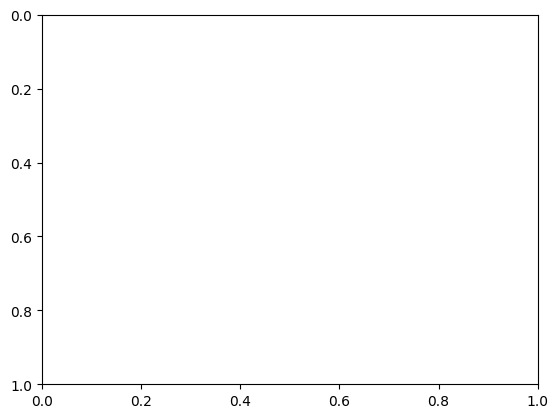

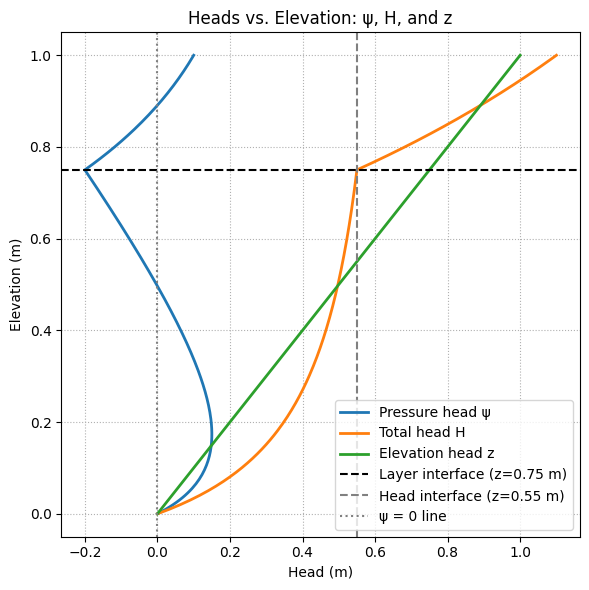

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Setup parameters
# -------------------------------
a = 0.05         # bottom radius (m)
b = 0.25         # slope of radius (m/m)
K1 = 0.4         # m/day (upper 0.25 m)
K2 = 7.2         # m/day (lower 0.75 m)
z_interface = 0.75
H_top = 1.1      # total head at top (m)
H_bottom = 0.0   # total head at bottom (m)
z_top = 1.0
z_bottom = 0.0

# Discharge Q calculation
term_up = (1/(a + b*z_top) - 1/(a + b*z_interface)) / K1
term_low = (1/(a + b*z_interface) - 1/(a + b*z_bottom)) / K2
Q = (H_top - H_bottom) * np.pi * b / (term_low + term_up)
print(f"Discharge Q: {Q:.3f} m³/day")

# Piecewise total head functions
def H_lower(z):
    """
    Total head in lower layer.

     parameters: z = Elevation (m)
     return: Total head H (m)
    """
    return H_bottom + (Q / (K2 * np.pi * b)) * (1/(a + b*z) - 1/(a + b*z_bottom))


H_interface = H_lower(z_interface)


def H_upper(z):
    """
    Total head in upper layer.

     parameters: z = Elevation (m)
     return: Total head H (m)
    """
    return H_interface + (Q / (K1 * np.pi * b)) * (1/(a + b*z) - 1/(a + b*z_interface))


# Build profiles
z1 = np.linspace(z_bottom, z_interface, 150)
z2 = np.linspace(z_interface, z_top, 80)
H1 = H_lower(z1)
H2 = H_upper(z2)

z_all = np.concatenate([z1, z2])  # Elevation array
H_all = np.concatenate([H1, H2])  # Total head array
psi_all = H_all - z_all           # Pressure head ψ
z_head = z_all                    # Elevation head z

z_max = np.max(z_all)
H_max = np.max(H_all)
P_max = np.max(psi_all)
P_min = np.min(psi_all)

print(f"Elevation Head Max:   {z_max} mH2O")
print(f"Total Head Max:       {H_max} mH2O")
print(f"Pressure Head Max:   {P_max:.2f} mH2O")
print(f"Pressure Head Min:  {P_min:.2f} mH2O")

# --------------------------------------------
# FIGURE: ψ (pressure), H (total), and z (elev)
# --------------------------------------------
plt.gca().invert_yaxis()  # reverse elevation axis
plt.figure(figsize=(6, 6))
plt.plot(psi_all, z_all, linewidth=2, label='Pressure head ψ')
plt.plot(H_all,   z_all, linewidth=2, label='Total head H')
plt.plot(z_head,  z_all, linewidth=2, label='Elevation head z')

# Helpful guides
plt.axhline(z_interface, color="black", linestyle='--', label='Layer interface (z=0.75 m)')
plt.axvline(H_interface, color="grey", linestyle='--', label='Head interface (z=0.55 m)')
plt.axvline(0.0, color="grey", linestyle=':', label='ψ = 0 line')

plt.xlabel('Head (m)')
plt.ylabel('Elevation (m)')
plt.title('Heads vs. Elevation: ψ, H, and z')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.savefig('./plots/HW5_Physical_PressHeadProfwMax.png')
plt.show()

